# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.


### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

##### Answer: The dataset reflects data collected for 17 marketing campaigns that took place between May 2008 and November 2010.  


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
# Determination of missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

##### Answer: There are no missing values in the dataset

##### Identified features and gruped them 

In [5]:
# Feature understanding - Identified categorical features
categorical_cols = ['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Feature understanding - Identified numerical features
# Note 'duration' is dropped as duration data is not consistent and its inclusion would be detrimental to model predictive quality. Note that 'emp.var.rate' and 'nr.employed' are dropped as well
# as these quarterly indicators should not influence the customer decision to open/or not a deposit account
numeric_cols = ['age', 'campaign', 'pdays', 'previous','cons.price.idx','cons.conf.idx','euribor3m']

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

##### Answer: The business objective of the task is to develop a quantitative classification model that can be used to increase the efficacy (number of new deposits subscribed by customers) and efficency (assign the right mix of resourcess and efforts to minimize cost) of bank marketing campaigns by explaining the success of marketing contacts.


In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:
# Import libraries to perform feature and model analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve


In [9]:
# Select model features before scaling/encoding
X = df.drop(['y','duration','emp.var.rate','nr.employed'], axis=1)


In [10]:
# Check feature data frame
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
dtypes: float64(3), int64(4), object

In [11]:
# Summary statistics for numerical features before scaling transformation
X.describe()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,93.575664,-40.502600,3.621291
std,10.42125,2.770014,186.910907,0.494901,0.578840,4.628198,1.734447
min,17.00000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.634000
25%,32.00000,1.000000,999.000000,0.000000,93.075000,-42.700000,1.344000
50%,38.00000,2.000000,999.000000,0.000000,93.749000,-41.800000,4.857000
75%,47.00000,3.000000,999.000000,0.000000,93.994000,-36.400000,4.961000
max,98.00000,56.000000,999.000000,7.000000,94.767000,-26.900000,5.045000


In [12]:
#Standardize numerical features
standard_scaler = StandardScaler()
X[numeric_cols] = standard_scaler.fit_transform(X[numeric_cols])
X.describe()


,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,41188.000000
mean,-1.880382e-16,-7.590531e-17,-2.580781e-16,5.520386e-18,-3.315820e-14,-1.352495e-16,0.000000
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012
min,-2.209365e+00,-5.659220e-01,-5.149443e+00,-3.494943e-01,-2.374889e+00,-2.224953e+00,-1.722351
25%,-7.699804e-01,-5.659220e-01,1.954139e-01,-3.494943e-01,-8.649547e-01,-4.747909e-01,-1.312994
50%,-1.942267e-01,-2.049085e-01,1.954139e-01,-3.494943e-01,2.994571e-01,-2.803284e-01,0.712460
75%,6.694038e-01,1.561049e-01,1.954139e-01,-3.494943e-01,7.227225e-01,8.864466e-01,0.772422
max,5.563310e+00,1.928982e+01,1.954139e-01,1.379492e+01,2.058168e+00,2.939106e+00,0.820853


##### As expected numeric feature standardization removes the mean (mean ~= 0) and scales to unit variance


In [13]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.722722,0.886447,0.71246
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.722722,0.886447,0.71246
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.722722,0.886447,0.71246
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.722722,0.886447,0.71246
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.722722,0.886447,0.71246


In [14]:
#Encode categorical features
X = pd.get_dummies(data = X, columns = categorical_cols)



In [15]:
X.head()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,1.628993,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,-0.290186,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,-0.002309,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4,1.533034,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   campaign                       41188 non-null  float64
 2   pdays                          41188 non-null  float64
 3   previous                       41188 non-null  float64
 4   cons.price.idx                 41188 non-null  float64
 5   cons.conf.idx                  41188 non-null  float64
 6   euribor3m                      41188 non-null  float64
 7   job_admin.                     41188 non-null  bool   
 8   job_blue-collar                41188 non-null  bool   
 9   job_entrepreneur               41188 non-null  bool   
 10  job_housemaid                  41188 non-null  bool   
 11  job_management                 41188 non-null  bool   
 12  job_retired                    41188 non-null 

In [17]:
# Target feature before encoding
y = df.y

In [18]:
# Label encoding
le = LabelEncoder()
y = le.fit_transform(y)


In [19]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [20]:
# Check if there is target class imbalance
df.y.value_counts(normalize = True)


y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

##### There is a substantial class imbalance in the data set with 88.7% on target entries being 0 ('no') and 11.3% being 1 ('yes')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [21]:
# Use stratification to address class imbalance. Generate a 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [22]:
# Establish baseline using sklearn dummy classifier
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)

print(baseline_score)

0.8873512988589464


##### Answer: The baseline performance that our classifier should aim to beat is an accuracy of 88.76%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [23]:
lr_default_model = LogisticRegression()
start_time = time.time()
lr_default_model.fit(X_train, y_train)
end_time = time.time()
lr_default_model_train_time = end_time - start_time


### Problem 9: Score the Model

What is the accuracy of your model?

In [24]:
lr_default_model_train_acc = lr_default_model.score(X_train, y_train)
lr_default_model_test_acc = lr_default_model.score(X_test, y_test)

print(f'Default LR model Training Accuracy: {lr_default_model_train_acc: .3f}')
print(f'Default LR model Test Accuracy: {lr_default_model_test_acc: .3f}')
print(f'Default LR model Train Time: {lr_default_model_train_time: .3f}')

Default LR model Training Accuracy:  0.900
Default LR model Test Accuracy:  0.902
Default LR model Train Time:  0.155


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [25]:
knn_default_model = KNeighborsClassifier()

start_time = time.time()
knn_default_model.fit(X_train, y_train)
end_time = time.time()
knn_default_model_train_time = end_time - start_time

knn_default_model_train_acc = knn_default_model.score(X_train, y_train)
knn_default_model_test_acc = knn_default_model.score(X_test, y_test)

print(f'Default KNN model Training Accuracy: {knn_default_model_train_acc: .3f}')
print(f'Default KNN model Test Accuracy: {knn_default_model_test_acc: .3f}')
print(f'Default KNN model Train Time: {knn_default_model_train_time: .3f}')

Default KNN model Training Accuracy:  0.913
Default KNN model Test Accuracy:  0.897
Default KNN model Train Time:  0.019


In [26]:
dtree_default_model = DecisionTreeClassifier()

start_time = time.time()
dtree_default_model.fit(X_train, y_train)
end_time = time.time()
dtree_default_model_train_time = end_time - start_time

dtree_default_model_train_acc = dtree_default_model.score(X_train, y_train)
dtree_default_model_test_acc = dtree_default_model.score(X_test, y_test)

print(f'Default DTree model Training Accuracy: {dtree_default_model_train_acc: .3f}')
print(f'Default DTree model Test Accuracy: {dtree_default_model_test_acc: .3f}')
print(f'Default DTree model Train Time: {dtree_default_model_train_time: .3f}')

Default DTree model Training Accuracy:  0.995
Default DTree model Test Accuracy:  0.841
Default DTree model Train Time:  0.174


In [27]:
svm_default_model = SVC()

start_time = time.time()
svm_default_model.fit(X_train, y_train)
end_time = time.time()
svm_default_model_train_time = end_time - start_time

svm_default_model_train_acc = svm_default_model.score(X_train, y_train)
svm_default_model_test_acc = svm_default_model.score(X_test, y_test)

print(f'Default SVM model Training Accuracy: {svm_default_model_train_acc: .3f}')
print(f'Default SVM model Test Accuracy: {svm_default_model_test_acc: .3f}')
print(f'Default SVM model Train Time: {svm_default_model_train_time: .3f}')


Default SVM model Training Accuracy:  0.905
Default SVM model Test Accuracy:  0.903
Default SVM model Train Time:  86.148


In [28]:
# Create summary pandas data frame

In [29]:
d = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
     'Train Time': [lr_default_model_train_time, knn_default_model_train_time, dtree_default_model_train_time, svm_default_model_train_time],
     'Train Accuracy': [lr_default_model_train_acc, knn_default_model_train_acc, dtree_default_model_train_acc, svm_default_model_train_acc],
     'Test Accuracy': [lr_default_model_test_acc, knn_default_model_test_acc, dtree_default_model_test_acc, svm_default_model_test_acc]}
results_df = pd.DataFrame(data=d)
results_df.set_index('Model', inplace = True)

In [30]:
results_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.154610,0.900061,0.901554
KNN,0.018952,0.912564,0.897184
Decision Tree,0.174160,0.995417,0.840738
SVM,86.147918,0.905311,0.903010


##### The SVM default model had the best test accuracy, followed by the default LR model. The SVM model by far took the longest to compute.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Answer: Feature engineering and exploration. For example, should we keep the gender feature? Why or why not?

###### Feature engineering was performed in a previous section ("Understanding the features") above. The gender feature was not included in the dataset. 
###### The authors of the paper accompanying the dataset show in their paper that gender was not a relevant feature and should be dropped as differences in gender were not correlated with deposit subscription 

#### Hyperparameter tuning and grid search

The section below uses GridSearchCV to perform hyperparameter searches and tuning for different classification models. 

In [31]:
# Logistic regression model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
lr_model = Pipeline([("logistic", LogisticRegression(max_iter = 10000))])

# Define hyperparameters for tuning
penalty = ["l1", "l2"]       # Regularization terms: l1 (Lasso) and l2 (Ridge)
C = np.logspace(-1, 5, 20)   # Regularization strength; inverse of regularization parameter
solver = ["lbfgs", "liblinear", "sag", "saga"]  # Optimization algorithms

# Create the parameter grid
lr_param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__solver":solver}

lr_grid_model = GridSearchCV(estimator=lr_model,
                          param_grid=lr_param_grid,
                          cv=5,
                          scoring = "accuracy", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

lr_grid_model.fit(X_train, y_train)

lr_grid_cv_results = lr_grid_model.cv_results_
lr_grid_best_params = lr_grid_model.best_params_

lr_grid_train_acc = lr_grid_model.score(X_train, y_train)
lr_grid_test_acc = lr_grid_model.score(X_test, y_test)
lr_grid_mean_fit_time = np.mean(lr_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {lr_grid_train_acc: .3f}')
print(f'Test Accuracy: {lr_grid_test_acc: .3f}')
print(f'Mean fit time: {lr_grid_mean_fit_time: .3f}')
print(f'Best parameters of LR: {lr_grid_best_params}')
#print(f'Logistic regression GSCV results: {lr_grid_cv_results}')

C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.

Training Accuracy:  0.900
Test Accuracy:  0.902
Mean fit time:  35.058
Best parameters of LR: {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}


In [32]:
# Compute performance scores for accuracy optimized model
lr_val_model = LogisticRegression(penalty = 'l1', C = 0.1, solver = 'saga',max_iter = 10000)
lr_val_model.fit(X_train, y_train)
y_lr_pred = lr_val_model.predict(X_test)
lr_val_model_acc = accuracy_score(y_test, y_lr_pred)
lr_val_model_recall = recall_score(y_test, y_lr_pred)
lr_val_model_precision = precision_score(y_test, y_lr_pred)
lr_val_model_f1 = f1_score(y_test, y_lr_pred)

print(f'Optimized LR Model Accuracy: {lr_val_model_acc: .3f}')
print(f'Optimized LR Model Recall: {lr_val_model_recall: .3f}')
print(f'Optimized LR Model Precision: {lr_val_model_precision: .3f}')
print(f'Optimized LR Model F1 Score: {lr_val_model_f1: .3f}')


Optimized LR Model Accuracy:  0.902
Optimized LR Model Recall:  0.218
Optimized LR Model Precision:  0.709
Optimized LR Model F1 Score:  0.333


In [33]:
# Compute classification report
lr_val_model_classification_report = classification_report(y_test, y_lr_pred, digits=3)
print(lr_val_model_classification_report)


              precision    recall  f1-score   support

           0      0.909     0.989     0.947      7310
           1      0.709     0.218     0.333       928

    accuracy                          0.902      8238
   macro avg      0.809     0.603     0.640      8238
weighted avg      0.886     0.902     0.878      8238



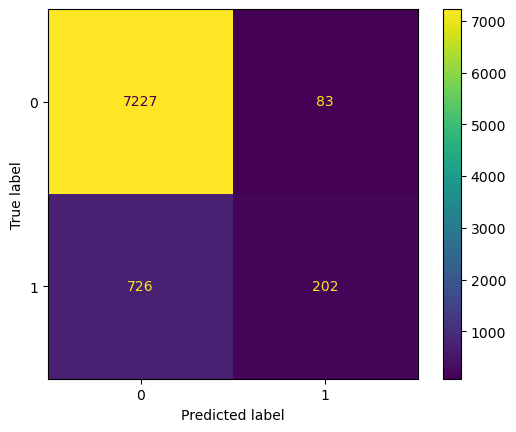

In [34]:
# Compute and display confusion matrix
cm_lr = confusion_matrix(y_test, y_lr_pred, labels=lr_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                              display_labels=lr_val_model.classes_)
disp.plot()


In [35]:
# SVM model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
svm_model = SVC()

# Define hyperparameters for tuning
C = [0.01, 0.1, 1.0, 10] # Regularization strength; inverse of regularization parameter
kernel = ['rbf', 'poly', 'linear', 'sigmoid']

# Create the parameter grid
svm_param_grid = {"kernel" : kernel,
              "C" : C}

svm_grid_model = GridSearchCV(estimator=svm_model,
                          param_grid=svm_param_grid,
                          cv=5,
                          scoring = "accuracy", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

svm_grid_model.fit(X_train, y_train)

svm_grid_cv_results = svm_grid_model.cv_results_
svm_grid_best_params = svm_grid_model.best_params_

svm_grid_train_acc = svm_grid_model.score(X_train, y_train)
svm_grid_test_acc = svm_grid_model.score(X_test, y_test)
svm_grid_mean_fit_time = np.mean(svm_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {svm_grid_train_acc: .3f}')
print(f'Test Accuracy: {svm_grid_test_acc: .3f}')
print(f'Mean fit time: {svm_grid_mean_fit_time: .3f}')
print(f'Best parameters of SVM: {svm_grid_best_params}')
#print(f'SVM model GSCV results: {svm_grid_cv_results}')

Training Accuracy:  0.905
Test Accuracy:  0.903
Mean fit time:  661.532
Best parameters of SVM: {'C': 1.0, 'kernel': 'rbf'}


In [36]:
# Compute performance scores for accuracy optimized model
svm_val_model = SVC(C = 1.0, kernel = 'rbf')
svm_val_model.fit(X_train, y_train)
y_svm_pred = svm_val_model.predict(X_test)
svm_val_model_acc = accuracy_score(y_test, y_svm_pred)
svm_val_model_recall = recall_score(y_test, y_svm_pred)
svm_val_model_precision = precision_score(y_test, y_svm_pred)
svm_val_model_f1 = f1_score(y_test, y_svm_pred)

print(f'Optimized SVM Model Accuracy: {svm_val_model_acc: .3f}')
print(f'Optimized SVM Model Recall: {svm_val_model_recall: .3f}')
print(f'Optimized SVM Model Precision: {svm_val_model_precision: .3f}')
print(f'Optimized SVM Model F1 Score: {svm_val_model_f1: .3f}')


Optimized SVM Model Accuracy:  0.903
Optimized SVM Model Recall:  0.247
Optimized SVM Model Precision:  0.696
Optimized SVM Model F1 Score:  0.364


In [37]:
# Compute classification report
svm_val_model_classification_report = classification_report(y_test, y_svm_pred, digits=3)
print(svm_val_model_classification_report)

              precision    recall  f1-score   support

           0      0.912     0.986     0.947      7310
           1      0.696     0.247     0.364       928

    accuracy                          0.903      8238
   macro avg      0.804     0.617     0.656      8238
weighted avg      0.887     0.903     0.882      8238



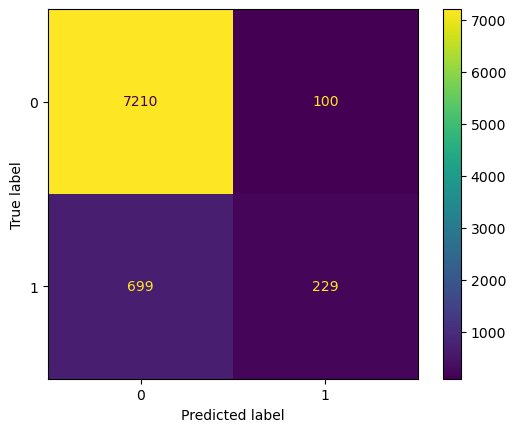

In [38]:
cm_svm = confusion_matrix(y_test, y_svm_pred, labels=svm_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=svm_val_model.classes_)
disp.plot()


In [39]:
# KNN model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
knn_model = KNeighborsClassifier()

# Define hyperparameters for tuning
n_neighbors = [2, 5, 10, 20]
p = [1, 2, 3]
weight_options = ['uniform', 'distance']


# Create the parameter grid
knn_param_grid = {"n_neighbors" : n_neighbors,
              "p" : p,
              "weights":weight_options}

knn_grid_model = GridSearchCV(estimator=knn_model,
                          param_grid=knn_param_grid,
                          cv=5,
                          scoring = "accuracy", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

knn_grid_model.fit(X_train, y_train)

knn_grid_cv_results = knn_grid_model.cv_results_
knn_grid_best_params = knn_grid_model.best_params_

knn_grid_train_acc = knn_grid_model.score(X_train, y_train)
knn_grid_test_acc = knn_grid_model.score(X_test, y_test)
knn_grid_mean_fit_time = np.mean(knn_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {knn_grid_train_acc: .3f}')
print(f'Test Accuracy: {knn_grid_test_acc: .3f}')
print(f'Mean fit time: {knn_grid_mean_fit_time: .3f}')
print(f'Best parameters of KNN: {knn_grid_best_params}')
#print(f'KNN model GSCV results: {knn_grid_cv_results}')

Training Accuracy:  0.903
Test Accuracy:  0.901
Mean fit time:  0.026
Best parameters of KNN: {'n_neighbors': 20, 'p': 3, 'weights': 'uniform'}


In [40]:
# Compute performance scores for accuracy optimized model
knn_val_model = KNeighborsClassifier(n_neighbors = 20, p = 3, weights = 'uniform')
knn_val_model.fit(X_train, y_train)
y_knn_pred = knn_val_model.predict(X_test)
knn_val_model_acc = accuracy_score(y_test, y_knn_pred)
knn_val_model_recall = recall_score(y_test, y_knn_pred)
knn_val_model_precision = precision_score(y_test, y_knn_pred)
knn_val_model_f1 = f1_score(y_test, y_knn_pred)

print(f'Optimized KNN Model Accuracy: {knn_val_model_acc: .3f}')
print(f'Optimized KNN Model Recall: {knn_val_model_recall: .3f}')
print(f'Optimized KNN Model Precision: {knn_val_model_precision: .3f}')
print(f'Optimized KNN Model F1 Score: {knn_val_model_f1: .3f}')

Optimized KNN Model Accuracy:  0.901
Optimized KNN Model Recall:  0.219
Optimized KNN Model Precision:  0.690
Optimized KNN Model F1 Score:  0.332


In [41]:
# Compute classification report
knn_val_model_classification_report = classification_report(y_test, y_knn_pred, digits=3)
print(knn_val_model_classification_report)

              precision    recall  f1-score   support

           0      0.909     0.988     0.947      7310
           1      0.690     0.219     0.332       928

    accuracy                          0.901      8238
   macro avg      0.800     0.603     0.639      8238
weighted avg      0.884     0.901     0.877      8238



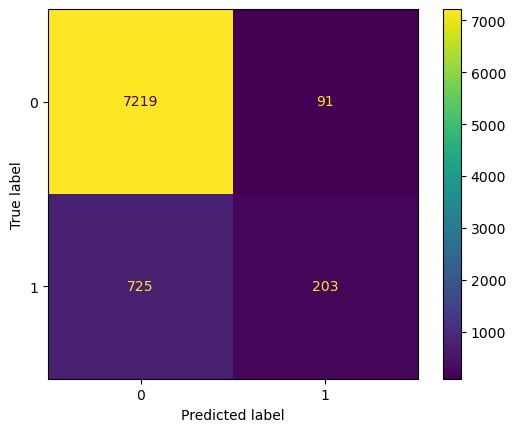

In [42]:
cm_knn = confusion_matrix(y_test, y_knn_pred, labels=knn_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=knn_val_model.classes_)
disp.plot()


In [43]:
# Decision tree model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
dtree_model = DecisionTreeClassifier()

# Define hyperparameters for tuning
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [2, 5, 10, 15, 20]
min_samples_split = [2, 3, 5]


# Create the parameter grid
dtree_param_grid = {"criterion" : criterion,
              "max_depth" : max_depth,
              "min_samples_split":min_samples_split}

dtree_grid_model = GridSearchCV(estimator=dtree_model,
                          param_grid=dtree_param_grid,
                          cv=5,
                          scoring = "accuracy", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

dtree_grid_model.fit(X_train, y_train)

dtree_grid_cv_results = dtree_grid_model.cv_results_
dtree_grid_best_params = dtree_grid_model.best_params_

dtree_grid_train_acc = dtree_grid_model.score(X_train, y_train)
dtree_grid_test_acc = dtree_grid_model.score(X_test, y_test)
dtree_grid_mean_fit_time = np.mean(dtree_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {dtree_grid_train_acc: .3f}')
print(f'Test Accuracy: {dtree_grid_test_acc: .3f}')
print(f'Mean fit time: {dtree_grid_mean_fit_time: .3f}')
print(f'Best parameters of tree: {dtree_grid_best_params}')
#print(f'Decision Tree model GSCV results: {dtree_grid_cv_results}')

Training Accuracy:  0.903
Test Accuracy:  0.903
Mean fit time:  0.222
Best parameters of tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3}


In [44]:
# Compute performance scores for accuracy optimized model
dtree_val_model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 3, criterion = 'gini')
dtree_val_model.fit(X_train, y_train)
y_dtree_pred = dtree_val_model.predict(X_test)
dtree_val_model_acc = accuracy_score(y_test, y_dtree_pred)
dtree_val_model_recall = recall_score(y_test, y_dtree_pred)
dtree_val_model_precision = precision_score(y_test, y_dtree_pred)
dtree_val_model_f1 = f1_score(y_test, y_dtree_pred)

print(f'Optimized DTree Model Accuracy: {dtree_val_model_acc: .3f}')
print(f'Optimized DTree Model Recall: {dtree_val_model_recall: .3f}')
print(f'Optimized DTree Model Precision: {dtree_val_model_precision: .3f}')
print(f'Optimized DTree Model F1 Score: {dtree_val_model_f1: .3f}')

Optimized DTree Model Accuracy:  0.903
Optimized DTree Model Recall:  0.259
Optimized DTree Model Precision:  0.678
Optimized DTree Model F1 Score:  0.374


In [45]:
# Compute classification report
dtree_val_model_classification_report = classification_report(y_test, y_dtree_pred, digits=3)
print(dtree_val_model_classification_report)

              precision    recall  f1-score   support

           0      0.913     0.984     0.947      7310
           1      0.678     0.259     0.374       928

    accuracy                          0.903      8238
   macro avg      0.795     0.622     0.661      8238
weighted avg      0.886     0.903     0.883      8238



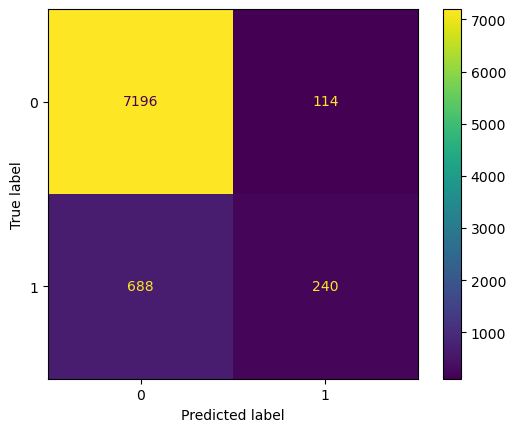

In [46]:
cm_dtree = confusion_matrix(y_test, y_dtree_pred, labels=dtree_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtree,
                              display_labels=dtree_val_model.classes_)
disp.plot()

In [47]:
# Create summary pandas data frame

In [48]:
d2 = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
     'Fit Time': [lr_grid_mean_fit_time, knn_grid_mean_fit_time, dtree_grid_mean_fit_time, svm_grid_mean_fit_time],
     'Test Accuracy': [lr_val_model_acc, knn_val_model_acc, dtree_val_model_acc, svm_val_model_acc],
     'Test Recall': [lr_val_model_recall, knn_val_model_recall, dtree_val_model_recall, svm_val_model_recall],
     'Test Precision': [lr_val_model_precision, knn_val_model_precision, dtree_val_model_precision, svm_val_model_precision],
     'Test F1': [lr_val_model_f1, knn_val_model_f1, dtree_val_model_f1, svm_val_model_f1]}
results_df2 = pd.DataFrame(data=d2)
results_df2.set_index('Model', inplace = True)




In [49]:
print('Summary model results optimized for accuracy scores')
results_df2

Summary model results optimized for accuracy scores


,Fit Time,Test Accuracy,Test Recall,Test Precision,Test F1
Model,,,,,
Logistic Regression,35.058125,0.901797,0.217672,0.708772,0.333059
KNN,0.025648,0.900947,0.218750,0.690476,0.332242
Decision Tree,0.221945,0.902646,0.258621,0.677966,0.374415
SVM,661.531518,0.903010,0.246767,0.696049,0.364360


#### Adjust performance metric 

We observed there is the opportunity for precision scores to be increased. In this section we optimize model hyperparameters for precision as an alternative metric, seeking to reduce FP numbers and increase precision scores.

In [50]:
# Logistic regression model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
lr_model = Pipeline([("logistic", LogisticRegression(max_iter = 10000))])

# Define hyperparameters for tuning
penalty = ["l1", "l2"]       # Regularization terms: l1 (Lasso) and l2 (Ridge)
C = np.logspace(-1, 5, 20)   # Regularization strength; inverse of regularization parameter
solver = ["lbfgs", "liblinear", "sag", "saga"]  # Optimization algorithms

# Create the parameter grid
lr_param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__solver":solver}

lr_grid_model = GridSearchCV(estimator=lr_model,
                          param_grid=lr_param_grid,
                          cv=5,
                          scoring = "precision", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

lr_grid_model.fit(X_train, y_train)

lr_grid_cv_results = lr_grid_model.cv_results_
lr_grid_best_params = lr_grid_model.best_params_

lr_grid_train_acc = lr_grid_model.score(X_train, y_train)
lr_grid_test_acc = lr_grid_model.score(X_test, y_test)
lr_grid_mean_fit_time = np.mean(lr_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {lr_grid_train_acc: .3f}')
print(f'Test Accuracy: {lr_grid_test_acc: .3f}')
print(f'Mean fit time: {lr_grid_mean_fit_time: .3f}')
print(f'Best parameters of LR: {lr_grid_best_params}')
#print(f'Logistic regression GSCV results: {lr_grid_cv_results}')

C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\accg2\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.

Training Accuracy:  0.664
Test Accuracy:  0.709
Mean fit time:  34.942
Best parameters of LR: {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}


In [51]:
# Compute performance scores for precision optimized model
lr_val_model = LogisticRegression(penalty = 'l1', C = 0.1, solver = 'saga',max_iter = 10000)
lr_val_model.fit(X_train, y_train)
y_lr_pred = lr_val_model.predict(X_test)
lr_val_model_acc = accuracy_score(y_test, y_lr_pred)
lr_val_model_recall = recall_score(y_test, y_lr_pred)
lr_val_model_precision = precision_score(y_test, y_lr_pred)
lr_val_model_f1 = f1_score(y_test, y_lr_pred)

print(f'Optimized LR Model Accuracy: {lr_val_model_acc: .3f}')
print(f'Optimized LR Model Recall: {lr_val_model_recall: .3f}')
print(f'Optimized LR Model Precision: {lr_val_model_precision: .3f}')
print(f'Optimized LR Model F1 Score: {lr_val_model_f1: .3f}')


Optimized LR Model Accuracy:  0.902
Optimized LR Model Recall:  0.218
Optimized LR Model Precision:  0.709
Optimized LR Model F1 Score:  0.333


In [52]:
# Compute classification report
lr_val_model_classification_report = classification_report(y_test, y_lr_pred, digits=3)
print(lr_val_model_classification_report)


              precision    recall  f1-score   support

           0      0.909     0.989     0.947      7310
           1      0.709     0.218     0.333       928

    accuracy                          0.902      8238
   macro avg      0.809     0.603     0.640      8238
weighted avg      0.886     0.902     0.878      8238



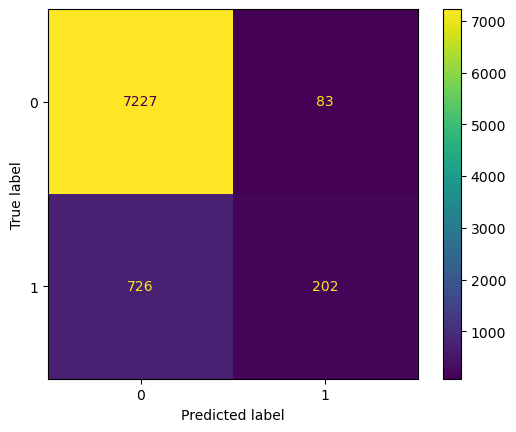

In [53]:
# Compute and display confusion matrix
cm_lr = confusion_matrix(y_test, y_lr_pred, labels=lr_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                              display_labels=lr_val_model.classes_)
disp.plot()


In [54]:
# SVM model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
svm_model = SVC()

# Define hyperparameters for tuning
C = [0.01, 0.1, 1.0, 10] # Regularization strength; inverse of regularization parameter
kernel = ['rbf', 'poly', 'linear', 'sigmoid']

# Create the parameter grid
svm_param_grid = {"kernel" : kernel,
              "C" : C}

svm_grid_model = GridSearchCV(estimator=svm_model,
                          param_grid=svm_param_grid,
                          cv=5,
                          scoring = "precision", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

svm_grid_model.fit(X_train, y_train)

svm_grid_cv_results = svm_grid_model.cv_results_
svm_grid_best_params = svm_grid_model.best_params_

svm_grid_train_acc = svm_grid_model.score(X_train, y_train)
svm_grid_test_acc = svm_grid_model.score(X_test, y_test)
svm_grid_mean_fit_time = np.mean(svm_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {svm_grid_train_acc: .3f}')
print(f'Test Accuracy: {svm_grid_test_acc: .3f}')
print(f'Mean fit time: {svm_grid_mean_fit_time: .3f}')
print(f'Best parameters of SVM: {svm_grid_best_params}')
#print(f'SVM model GSCV results: {svm_grid_cv_results}')

Training Accuracy:  0.702
Test Accuracy:  0.732
Mean fit time:  659.170
Best parameters of SVM: {'C': 0.01, 'kernel': 'poly'}


In [55]:
# Compute performance scores for precision optimized model
svm_val_model = SVC(C = 0.01, kernel = 'poly')
svm_val_model.fit(X_train, y_train)
y_svm_pred = svm_val_model.predict(X_test)
svm_val_model_acc = accuracy_score(y_test, y_svm_pred)
svm_val_model_recall = recall_score(y_test, y_svm_pred)
svm_val_model_precision = precision_score(y_test, y_svm_pred)
svm_val_model_f1 = f1_score(y_test, y_svm_pred)

print(f'Optimized SVM Model Accuracy: {svm_val_model_acc: .3f}')
print(f'Optimized SVM Model Recall: {svm_val_model_recall: .3f}')
print(f'Optimized SVM Model Precision: {svm_val_model_precision: .3f}')
print(f'Optimized SVM Model F1 Score: {svm_val_model_f1: .3f}')


Optimized SVM Model Accuracy:  0.900
Optimized SVM Model Recall:  0.180
Optimized SVM Model Precision:  0.732
Optimized SVM Model F1 Score:  0.289


In [56]:
# Compute classification report
svm_val_model_classification_report = classification_report(y_test, y_svm_pred, digits=3)
print(svm_val_model_classification_report)

              precision    recall  f1-score   support

           0      0.905     0.992     0.946      7310
           1      0.732     0.180     0.289       928

    accuracy                          0.900      8238
   macro avg      0.819     0.586     0.618      8238
weighted avg      0.886     0.900     0.872      8238



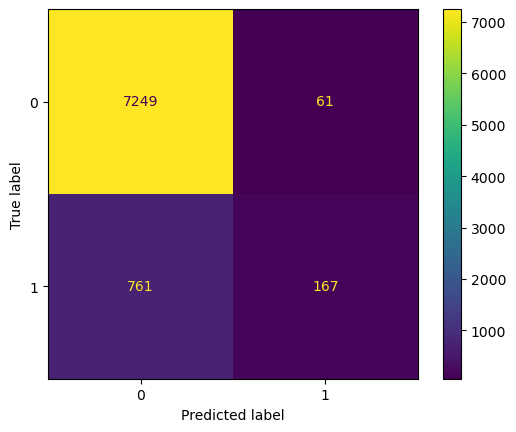

In [57]:
cm_svm = confusion_matrix(y_test, y_svm_pred, labels=svm_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=svm_val_model.classes_)
disp.plot()


In [58]:
# KNN model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
knn_model = KNeighborsClassifier()

# Define hyperparameters for tuning
n_neighbors = [2, 5, 10, 20]
p = [1, 2, 3]
weight_options = ['uniform', 'distance']


# Create the parameter grid
knn_param_grid = {"n_neighbors" : n_neighbors,
              "p" : p,
              "weights":weight_options}

knn_grid_model = GridSearchCV(estimator=knn_model,
                          param_grid=knn_param_grid,
                          cv=5,
                          scoring = "precision", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

knn_grid_model.fit(X_train, y_train)

knn_grid_cv_results = knn_grid_model.cv_results_
knn_grid_best_params = knn_grid_model.best_params_

knn_grid_train_acc = knn_grid_model.score(X_train, y_train)
knn_grid_test_acc = knn_grid_model.score(X_test, y_test)
knn_grid_mean_fit_time = np.mean(knn_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {knn_grid_train_acc: .3f}')
print(f'Test Accuracy: {knn_grid_test_acc: .3f}')
print(f'Mean fit time: {knn_grid_mean_fit_time: .3f}')
print(f'Best parameters of KNN: {knn_grid_best_params}')
#print(f'KNN model GSCV results: {knn_grid_cv_results}')

Training Accuracy:  0.697
Test Accuracy:  0.672
Mean fit time:  0.033
Best parameters of KNN: {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}


In [59]:
# Compute performance scores for precision optimized model
knn_val_model = KNeighborsClassifier(n_neighbors = 20, p = 1, weights = 'uniform')
knn_val_model.fit(X_train, y_train)
y_knn_pred = knn_val_model.predict(X_test)
knn_val_model_acc = accuracy_score(y_test, y_knn_pred)
knn_val_model_recall = recall_score(y_test, y_knn_pred)
knn_val_model_precision = precision_score(y_test, y_knn_pred)
knn_val_model_f1 = f1_score(y_test, y_knn_pred)

print(f'Optimized KNN Model Accuracy: {knn_val_model_acc: .3f}')
print(f'Optimized KNN Model Recall: {knn_val_model_recall: .3f}')
print(f'Optimized KNN Model Precision: {knn_val_model_precision: .3f}')
print(f'Optimized KNN Model F1 Score: {knn_val_model_f1: .3f}')

Optimized KNN Model Accuracy:  0.899
Optimized KNN Model Recall:  0.210
Optimized KNN Model Precision:  0.672
Optimized KNN Model F1 Score:  0.320


In [60]:
# Compute classification report
knn_val_model_classification_report = classification_report(y_test, y_knn_pred, digits=3)
print(knn_val_model_classification_report)

              precision    recall  f1-score   support

           0      0.908     0.987     0.946      7310
           1      0.672     0.210     0.320       928

    accuracy                          0.899      8238
   macro avg      0.790     0.599     0.633      8238
weighted avg      0.881     0.899     0.875      8238



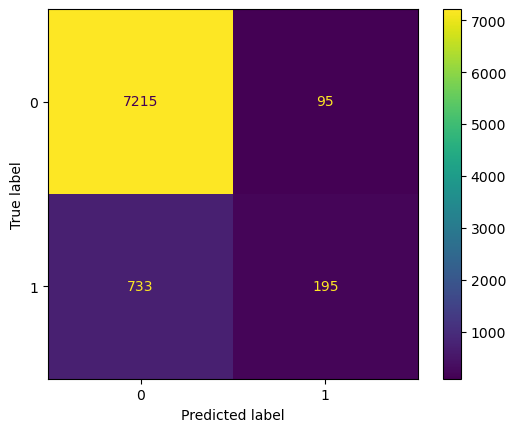

In [61]:
cm_knn = confusion_matrix(y_test, y_knn_pred, labels=knn_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=knn_val_model.classes_)
disp.plot()


In [62]:
# Decision tree model
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
dtree_model = DecisionTreeClassifier()

# Define hyperparameters for tuning
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [2, 5, 10, 15, 20]
min_samples_split = [2, 3, 5]


# Create the parameter grid
dtree_param_grid = {"criterion" : criterion,
              "max_depth" : max_depth,
              "min_samples_split":min_samples_split}

dtree_grid_model = GridSearchCV(estimator=dtree_model,
                          param_grid=dtree_param_grid,
                          cv=5,
                          scoring = "precision", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=False) # Return training scores

dtree_grid_model.fit(X_train, y_train)

dtree_grid_cv_results = dtree_grid_model.cv_results_
dtree_grid_best_params = dtree_grid_model.best_params_

dtree_grid_train_acc = dtree_grid_model.score(X_train, y_train)
dtree_grid_test_acc = dtree_grid_model.score(X_test, y_test)
dtree_grid_mean_fit_time = np.mean(dtree_grid_cv_results.get('mean_fit_time'))

### Summary results
print(f'Training Accuracy: {dtree_grid_train_acc: .3f}')
print(f'Test Accuracy: {dtree_grid_test_acc: .3f}')
print(f'Mean fit time: {dtree_grid_mean_fit_time: .3f}')
print(f'Best parameters of tree: {dtree_grid_best_params}')
#print(f'Decision Tree model GSCV results: {dtree_grid_cv_results}')

Training Accuracy:  0.704
Test Accuracy:  0.738
Mean fit time:  0.214
Best parameters of tree: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}


In [63]:
# Compute performance scores for precision optimized model
dtree_val_model = DecisionTreeClassifier(max_depth = 2, min_samples_split = 2, criterion = 'entropy')
dtree_val_model.fit(X_train, y_train)
y_dtree_pred = dtree_val_model.predict(X_test)
dtree_val_model_acc = accuracy_score(y_test, y_dtree_pred)
dtree_val_model_recall = recall_score(y_test, y_dtree_pred)
dtree_val_model_precision = precision_score(y_test, y_dtree_pred)
dtree_val_model_f1 = f1_score(y_test, y_dtree_pred)

print(f'Optimized DTree Model Accuracy: {dtree_val_model_acc: .3f}')
print(f'Optimized DTree Model Recall: {dtree_val_model_recall: .3f}')
print(f'Optimized DTree Model Precision: {dtree_val_model_precision: .3f}')
print(f'Optimized DTree Model F1 Score: {dtree_val_model_f1: .3f}')

Optimized DTree Model Accuracy:  0.900
Optimized DTree Model Recall:  0.170
Optimized DTree Model Precision:  0.738
Optimized DTree Model F1 Score:  0.277


In [64]:
# Compute classification report
dtree_val_model_classification_report = classification_report(y_test, y_dtree_pred, digits=3)
print(dtree_val_model_classification_report)

              precision    recall  f1-score   support

           0      0.904     0.992     0.946      7310
           1      0.738     0.170     0.277       928

    accuracy                          0.900      8238
   macro avg      0.821     0.581     0.611      8238
weighted avg      0.885     0.900     0.871      8238



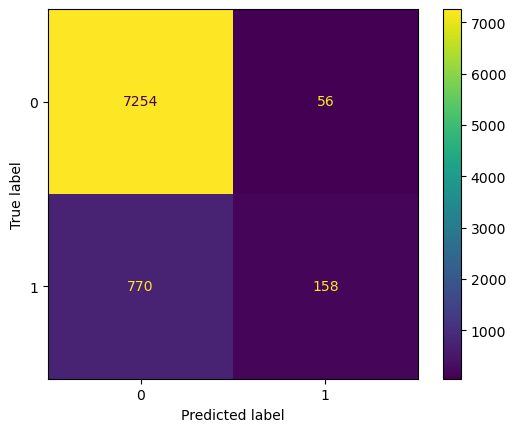

In [65]:
cm_dtree = confusion_matrix(y_test, y_dtree_pred, labels=dtree_val_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtree,
                              display_labels=dtree_val_model.classes_)
disp.plot()

In [66]:
# Create summary pandas data frame

In [67]:
d3 = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
     'Fit Time': [lr_grid_mean_fit_time, knn_grid_mean_fit_time, dtree_grid_mean_fit_time, svm_grid_mean_fit_time],
     'Test Accuracy': [lr_val_model_acc, knn_val_model_acc, dtree_val_model_acc, svm_val_model_acc],
     'Test Recall': [lr_val_model_recall, knn_val_model_recall, dtree_val_model_recall, svm_val_model_recall],
     'Test Precision': [lr_val_model_precision, knn_val_model_precision, dtree_val_model_precision, svm_val_model_precision],
     'Test F1': [lr_val_model_f1, knn_val_model_f1, dtree_val_model_f1, svm_val_model_f1]}
results_df3 = pd.DataFrame(data=d3)
results_df3.set_index('Model', inplace = True)




In [68]:
print('Summary model results optimized for precision scores')
results_df3

Summary model results optimized for precision scores


,Fit Time,Test Accuracy,Test Recall,Test Precision,Test F1
Model,,,,,
Logistic Regression,34.941535,0.901797,0.217672,0.708772,0.333059
KNN,0.033189,0.899490,0.210129,0.672414,0.320197
Decision Tree,0.214260,0.899733,0.170259,0.738318,0.276708
SVM,659.170179,0.900218,0.179957,0.732456,0.288927


#### Conclusion
We have shown how the CRISP-DM framework can be used for the analysis of a marketing application using AI/ML methods. We illustrated how different quantitative classification methods perform in predicting customer behavior (whether customer chooses to subscribe to offered deposit or not). These methods can be instrumental in ensuring marketing campaign success.

Decision Tree and SVM classifiers performed the best when models were optimized for accuracy or precision. Overall, it can be argued that SVM was the best performer for the conditions tested. The main drawback in using SVM was the long computation time compared to the other methods (KNN, LR, Decision Tree). 

The performance of the models was affected by a significant class imbalance in the target variable (88.7% on target entries were 0 ('no') and 11.3% were 1 ('yes')) which simple data stratification was not able to completely remove. Focused intent sampling is required to mitigate this imbalance. We will explore this technique in a future revision of this work.


###### Questions